In [46]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [47]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [48]:
len(X_train)

60000

In [49]:
len(X_test)

10000

In [50]:
X_train[0].shape

(28, 28)

In [51]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

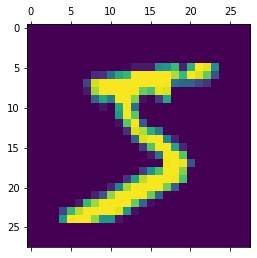

In [52]:
plt.matshow(X_train[0])

In [53]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [54]:
X_train.shape

(60000, 28, 28)

In [55]:
X_train = X_train / 255
X_test = X_test / 255

In [56]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

X_train_flattened.shape

(60000, 784)

In [57]:
X_test_flattened.shape

(10000, 784)

In [58]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [59]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4692 - accuracy: 0.8758
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3041 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2832 - accuracy: 0.9211
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2726 - accuracy: 0.9239
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2665 - accuracy: 0.9258


In [60]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 971us/step - loss: 0.2694 - accuracy: 0.9252


[0.26939234137535095, 0.9251999855041504]

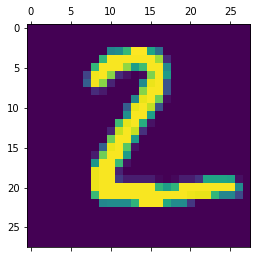

In [61]:
plt.matshow(X_test[1])

In [62]:
y_predicted = model.predict(X_test_flattened)

313/313 [==============================] - 0s 1ms/step


In [63]:
y_predicted[1]

array([7.5992793e-01, 8.2332473e-03, 9.9962968e-01, 3.6924234e-01,
       1.2710201e-09, 9.1309547e-01, 9.1672969e-01, 1.3927196e-12,
       1.9988072e-01, 5.4922071e-09], dtype=float32)

In [64]:
np.argmax(y_predicted[1])

2

In [65]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [66]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [67]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    0,    2,    0,    5,    4,    2,    1,    0],
       [   0, 1113,    2,    2,    0,    1,    4,    2,   11,    0],
       [   9,   10,  928,    9,    8,    5,   12,   11,   37,    3],
       [   6,    0,   24,  897,    0,   40,    2,   12,   22,    7],
       [   1,    1,    6,    0,  918,    0,    9,    4,   10,   33],
       [  10,    2,    3,   18,   11,  796,   14,    6,   26,    6],
       [  14,    3,    6,    1,    8,   16,  907,    2,    1,    0],
       [   2,    6,   23,    6,    9,    0,    0,  951,    1,   30],
       [  10,    7,    7,   17,    9,   36,    9,   12,  861,    6],
       [  11,    7,    1,    8,   28,    8,    0,   26,    5,  915]])>

Text(69.0, 0.5, 'Truth')

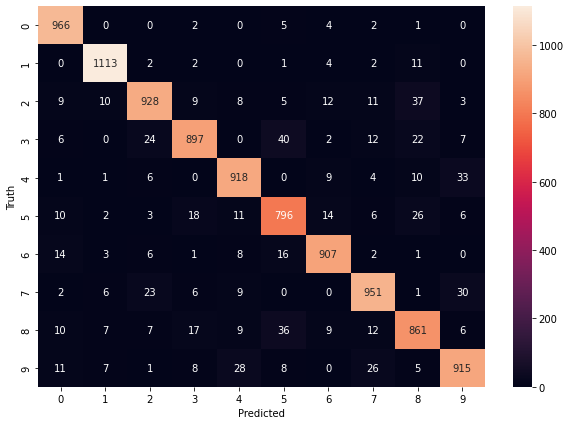

In [68]:
import seaborn as sns
plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [69]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2687 - accuracy: 0.9235
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1195 - accuracy: 0.9650
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0851 - accuracy: 0.9740
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0642 - accuracy: 0.9807
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0507 - accuracy: 0.9846


In [70]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0790 - accuracy: 0.9759


[0.07903891801834106, 0.9758999943733215]

313/313 [==============================] - 0s 1ms/step


Text(69.0, 0.5, 'Truth')

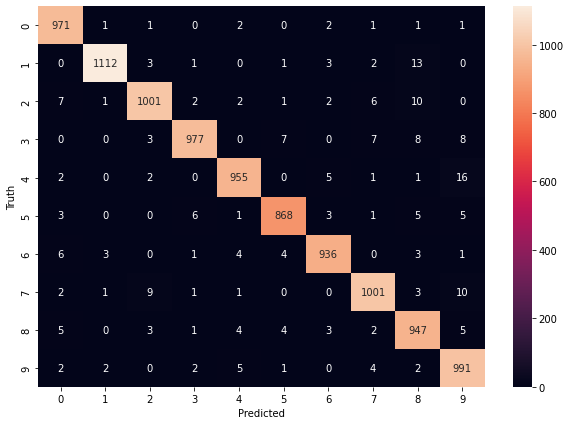

In [71]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)

plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [74]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2761 - accuracy: 0.9217
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1276 - accuracy: 0.9630
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0890 - accuracy: 0.9729
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0670 - accuracy: 0.9799
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0526 - accuracy: 0.9840
